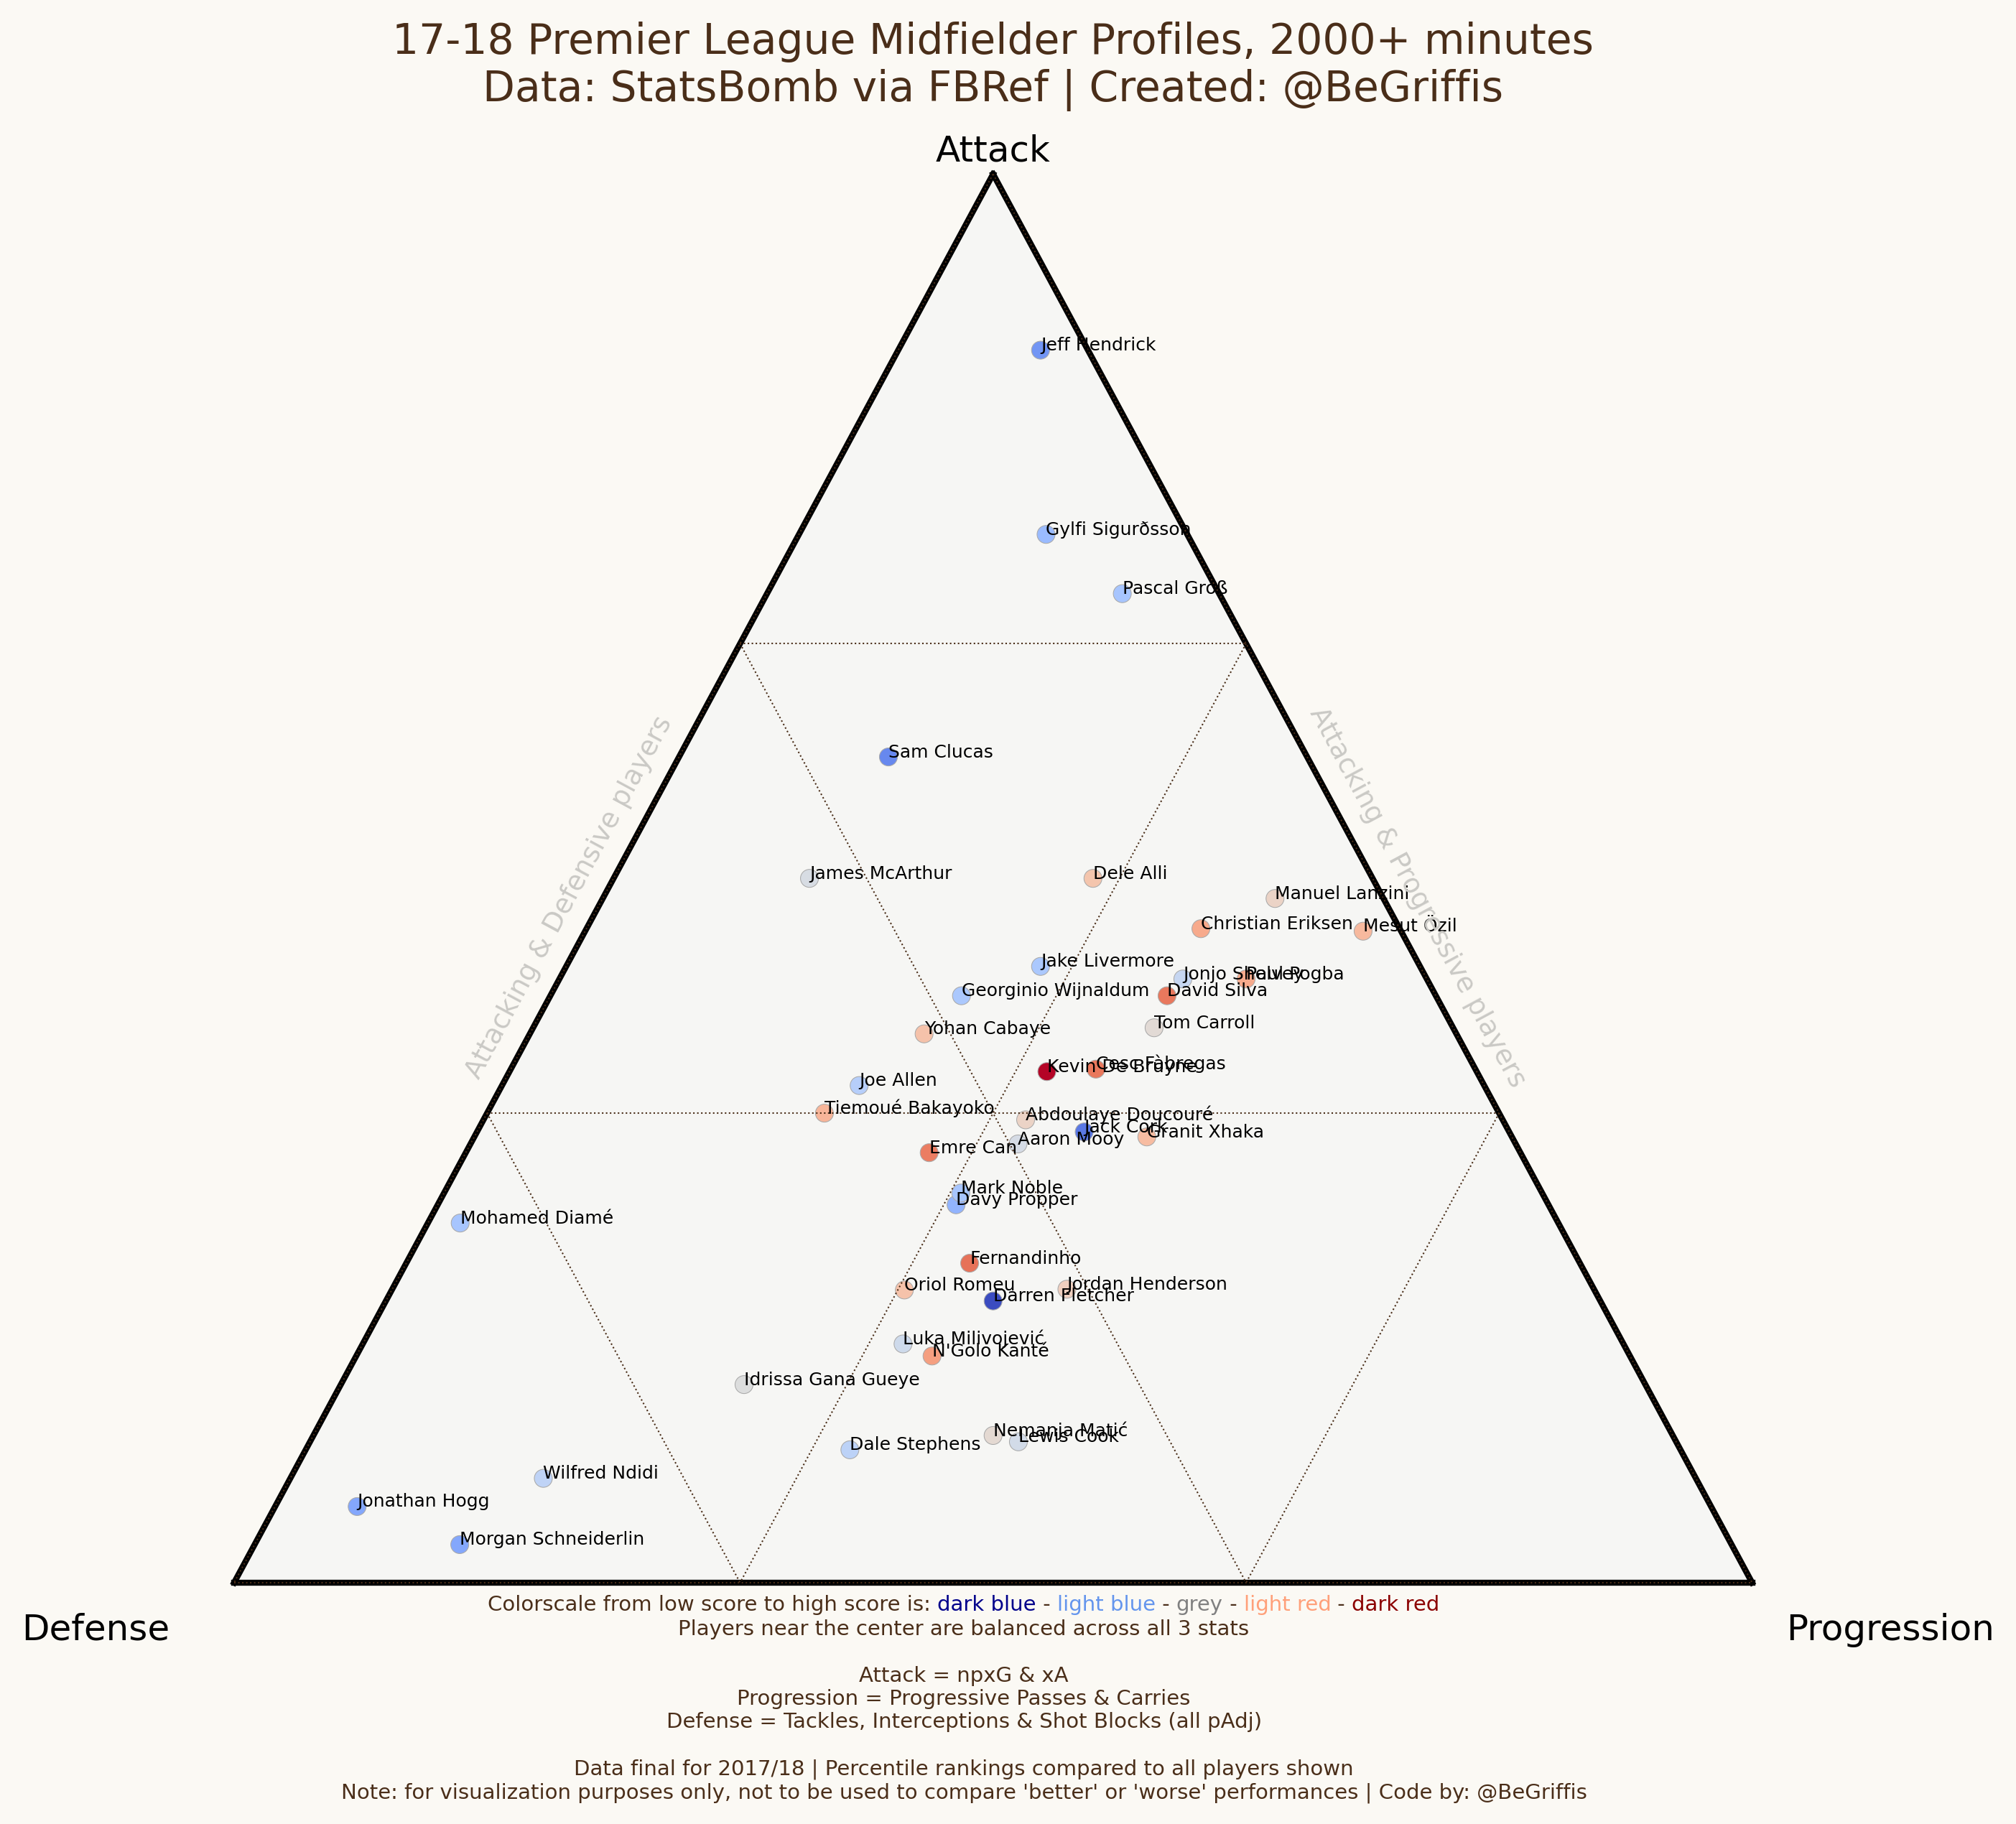

In [2]:
# https://github.com/marcharper/python-ternary
# This is the package I use for this code. Check it out for other cool ways to use Ternary plots!!

import ternary
import matplotlib
import random
import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean
import matplotlib.pyplot as plt
from highlight_text import fig_text


matplotlib.rcParams['figure.dpi'] = 300 #This sets the quality of the image. To save time I use 300 for getting them riht, and the 1500 for when I want to save it to show on twitter
matplotlib.rcParams['figure.figsize'] = (10, 10)

############# Set your variables here! Season to Sig is all you need to change!

season = '17-18'

# Include a note. Either if the season has finished, or if it's still in progress, the date of creation
data_time = 'Data final for 2017/18'


mins = 2000                       # Minutes for filer on
comp = "Premier League"           # League you want to show. Leave blank to do top 5 together
pos = 'Midfielder'          # See list below
sig = '@BeGriffis'                # Your twitter/website/etc handle


##### Single-Position Options #####
# Goalkeeper
# Centre-Back
# Left-Back
# Right-Back
# Defensive Midfield
# Central Midfield
# Left Midfield
# Right Midfield
# Attacking Midfield
# Left Winger
# Right Winger
# Second Striker
# Centre-Forward

##### Multiple Position Options #####
# Fullback (RB + LB)
# Midfielder (DM + CM + CAM)
# Winger (RM + LM + RW + RM))
# Forward (RW + LW + SS + ST)
# Striker (CF + SS)

######################################

if season == "21-22":
    ssn = "21-22"
    if pos == "Goalkeeper":
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202021-2022.csv'
    else:
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202021-2022.csv'
if season == "20-21":
    ssn = "20-21"
    if pos == "Goalkeeper":
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202020-2021.csv'
    else:
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202020-2021.csv'
if season == "19-20":
    ssn = "19-20"
    if pos == "Goalkeeper":
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202019-2020.csv'
    else:
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202019-2020.csv'
if season == "18-19":
    ssn = "18-19"
    if pos == "Goalkeeper":
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202018-2019.csv'
    else:
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202018-2019.csv'
if season == "17-18":
    ssn = "17-18"
    if pos == "Goalkeeper":
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202017-2018.csv'
    else:
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202017-2018.csv'

df = pd.read_csv(path)

# This just cleans up FBRef's names of each league
df["Comp"] = df["Comp"].replace("eng Premier League","Premier League")
df["Comp"] = df["Comp"].replace("fr Ligue 1","Ligue 1")
df["Comp"] = df["Comp"].replace("de Bundesliga","Bundesliga")
df["Comp"] = df["Comp"].replace("it Serie A","Serie A")
df["Comp"] = df["Comp"].replace("es La Liga","La Liga")

##################################################
######### Change anything here. If you change the variable names (progression, attack, defense), change them in the 'stat1' variables too
##################################################
df['Progression'] = df['ProgPassesPer90'] + df['ProgCarriesPer90']
df['Attack'] =df['npxGPer90'] + df['xAPer90']
df['Defense'] = df['pAdjTkl+IntPer90'] + df['pAdjShBlocksPer90']

# If you only want to plot a players' ranking in 3 single metrics, comment out the df['Progression'] etc lines,
# and change the variables in 'stat1' etc here to just those 3 variables. I give examples in comments next to them.

stat1 = 'Progression' # npxGPer90
stat2 = 'Attack' # xAPer90
stat3 = 'Defense' # pAdjTkl+IntPer90


df = df[df['Min']>=mins]
if comp != '':
    df = df[df['Comp']==comp]

if ((pos == 'Goalkeeper') or
    (pos == 'Centre-Back') or
    (pos == 'Left-Back') or
    (pos == 'Right-Back') or
    (pos == 'Defensive Midfield') or
    (pos == 'Central Midfield') or
    (pos == 'Left Midfield') or
    (pos == 'Right Midfield') or
    (pos == 'Attacking Midfield') or
    (pos == 'Left Winger') or
    (pos == 'Right Winger') or
    (pos == 'Second Striker') or
    (pos == 'Centre-Forward')
   ):
    df = df[df['Main Position'].str.contains(pos)]
if pos == 'Fullback':
    df = df[(df['Main Position'].str.contains('Left-Back')) |
                    (df['Main Position'].str.contains('Right-Back'))]
if pos == 'Midfielder':
    df = df[(df['Main Position'].str.contains('Defensive Midfield')) |
                    (df['Main Position'].str.contains('Central Midfield')) |
                    (df['Main Position'].str.contains('Attacking Midfield'))]
if pos == 'Winger':
    df = df[(df['Main Position'].str.contains('Right Midfield')) |
                    (df['Main Position'].str.contains('Left Midfield')) |
                    (df['Main Position'].str.contains('Left Winger')) |
                    (df['Main Position'].str.contains('Right Winger'))]
if pos == 'Forward':
    df = df[(df['Main Position'].str.contains('Centre-Forward')) |
                    (df['Main Position'].str.contains('Second Striker')) |
                    (df['Main Position'].str.contains('Left Winger')) |
                    (df['Main Position'].str.contains('Right Winger'))]

df = df.reset_index(drop=True)

# I'm keeping in this info here, but commenting it out. This is the logic you would use to show only certain teams' players
# If you only want to see a few teams' players, also comment out the competition line above.

# df = df[
#     (df['Squad']=='Granada') |
#     (df['Squad']=='Burnley') |
#     (df['Squad']=='Levante') |
#     (df['Squad']=='Arminia') |
#     (df['Squad']=='Alavés') |
#     (df['Squad']=='Cagliari') |
#     (df['Squad']=='Genoa') |
#     (df['Squad']=='Venezia') |
#     (df['Squad']=='Watford') |
#     (df['Squad']=='Norwich City') |
#     (df['Squad']=='Greuther Fürth')
# ]

# This info is needed to create each players' percentile rankings
player_list = list(df['Player'])
team_list = list(df['Squad'])


# Now we can get into actually making the plot! First, initialize some blank dfs
points = []
colors = []

# Now we calculate the percentile rankings of all players individually
for i in range(0,len(df)):
    player_name = player_list[i]
    team = team_list[i]
    
    player = df[(df['Player']==player_name) & (df['Squad']==team)]
    
    x1 = player[stat1].values[0]
    x2 = player[stat2].values[0]
    x3 = player[stat3].values[0]
    pct1 = stats.percentileofscore(df[stat1],x1)
    pct2 = stats.percentileofscore(df[stat2],x2)
    pct3 = stats.percentileofscore(df[stat3],x3)
    
    # This creates the coordinates of the player. Each stat's score as a % of their total score. That's the logic behind ternary plots at their basic form
    pct1_n = pct1/(pct1+pct2+pct3)*100
    pct2_n = pct2/(pct1+pct2+pct3)*100
    pct3_n = pct3/(pct1+pct2+pct3)*100
    
    # The total sum of a player's percentile ranking (out of 300) is their point's color
    col = pct1+pct2+pct3

    # Add each player's info to those blank dfs we initialized above
    points.append((pct1_n,pct2_n,pct3_n))
    colors.append(col)


### Scatter Plot

# I had to play around with mult & scale for a bit to find what worked. If you aren't changing the graph size, no need to change these.
# Read the github package I link in the first line of this code for more info on these
mult = 33.3333333
scale = 100

# Now the figure
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=mult, color="#4A2E19")
tax.scatter(points,
            edgecolors='darkgrey', linewidths=.25,
            c=colors, cmap='coolwarm', # Change the 'cmap' if you want to use a different matplotlib color map.
            vmin=min(colors), vmax=max(colors),
            label=player_list,
           )
if comp == '':
    comp = 'Top 5 Leagues'
tax.set_title("%s %s %s Profiles, %i+ minutes\nData: StatsBomb via FBRef | Created: %s" %(ssn, comp, pos, mins, sig),
              fontsize=14, color='#4A2E19')
tax.right_corner_label(stat1, fontsize=12, offset=.15)
tax.top_corner_label(stat2, fontsize=12, offset=.125)
tax.left_corner_label(stat3, fontsize=12, offset=.15)
tax.left_axis_label("Attacking & Defensive players", fontsize=9, offset=.05, color='#cac9c5')
tax.right_axis_label("Attacking & Progressive players", fontsize=9, offset=.05, color='#cac9c5')

##### IMPORTANT!! This is the title. You will need to edit it if you change any variables. the '\n', for those who don't know it, adds a new line.
tax.bottom_axis_label("\nPlayers near the center are balanced across all 3 stats\n\nAttack = npxG & xA\nProgression = Progressive Passes & Carries\nDefense = Tackles, Interceptions & Shot Blocks (all pAdj)\n\n%s | Percentile rankings compared to all players shown\nNote: for visualization purposes only, not to be used to compare 'better' or 'worse' performances | Code by: @BeGriffis" %data_time,
                      fontsize=7, offset=.07,
                     color='#4A2E19')

tax.get_axes().axis('off')

# The fun part... adding player names. Feel free to play around with the font size & color
for i, txt in enumerate(points):
    tax.annotate(player_list[i], points[i], fontsize=6,
                     color='black')

fig = plt.gcf()
fig.set_facecolor('#fbf9f4')

color_text = 'Colorscale from low score to high score is: <dark blue> - <light blue> - <grey> - <light red> - <dark red>'
fig_text(
    0.278, 0.195, color_text, color="#4A2E19",
    highlight_textprops=[{"color": 'darkblue'},
                         {'color' : 'cornflowerblue'},
                         {"color" : 'grey'},
                         {"color" : 'lightsalmon'},
                         {'color' : 'darkred'}
                        ],
    size=7, fig=fig,
)

